# Movie Sentiment Analysis

Dataset link : https://ai.stanford.edu/~amaas/data/sentiment/

Kaggle Dataset link : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd

In [2]:
url_path = "data/IMDB Dataset.csv"
df_original = pd.read_csv(url_path)

In [3]:
df = df_original.copy(deep=True)

# Basic Info

In [4]:
print(df.columns.to_list())

['review', 'sentiment']


In [5]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [7]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [8]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [9]:
print(df['review'].value_counts())

review
Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                         

# Descriptive Stats

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Summary Statistics

df['review_char_len'] = df['review'].apply(len)
df['review_word_len'] = df['review'].apply(lambda x: len(x.split()))

# Descriptive stats
print(df[['review_char_len','review_word_len']].describe())

       review_char_len  review_word_len
count     50000.000000     50000.000000
mean       1309.431020       231.156940
std         989.728014       171.343997
min          32.000000         4.000000
25%         699.000000       126.000000
50%         970.000000       173.000000
75%        1590.250000       280.000000
max       13704.000000      2470.000000


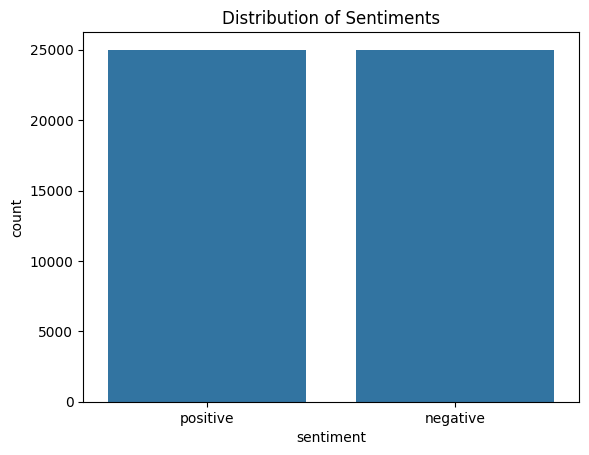

In [12]:
# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiments")
plt.show()

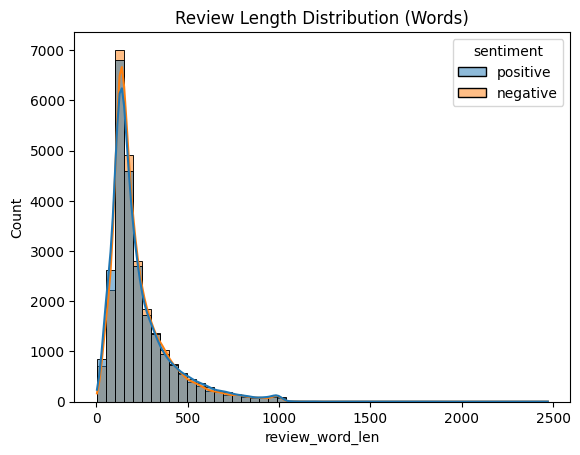

In [13]:
# Histogram of review word lengths
sns.histplot(data=df, x='review_word_len', bins=50, hue='sentiment', kde=True)
plt.title("Review Length Distribution (Words)")
plt.show()

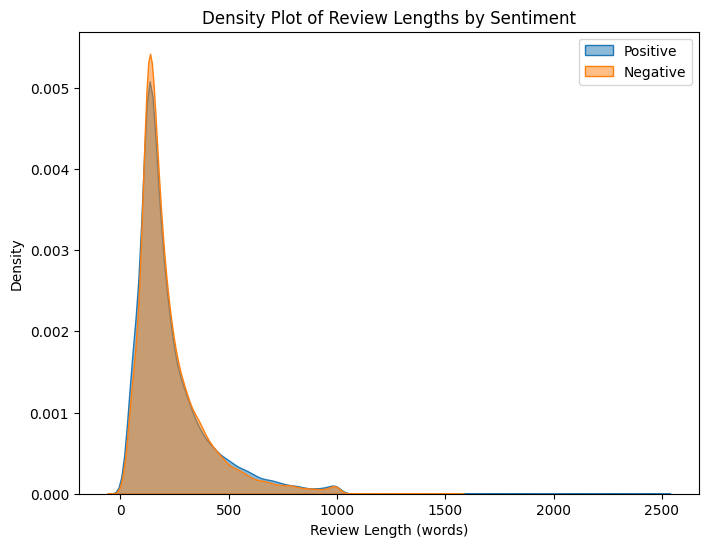

In [14]:
# KDE (Density Plot) of Review Lengths
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['sentiment']=='positive']['review_word_len'], label="Positive", fill=True, alpha=0.5)
sns.kdeplot(df[df['sentiment']=='negative']['review_word_len'], label="Negative", fill=True, alpha=0.5)
plt.title("Density Plot of Review Lengths by Sentiment")
plt.xlabel("Review Length (words)")
plt.ylabel("Density")
plt.legend()
plt.show()

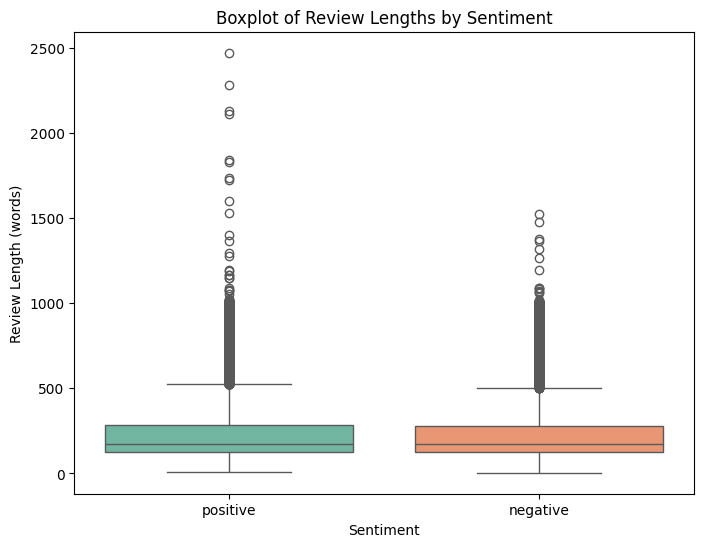

In [15]:
# Boxplot of Review Length by Sentiment
plt.figure(figsize=(8,6))
sns.boxplot(x="sentiment", y="review_word_len", data=df, palette="Set2", hue="sentiment")
plt.title("Boxplot of Review Lengths by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()

In [16]:
import numpy as np

In [17]:
# Calculate Q1, Q3, and IQR
Q1 = df['review_word_len'].quantile(0.25)
Q3 = df['review_word_len'].quantile(0.75)
IQR = Q3 - Q1


In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -105.0
Upper Bound: 511.0


In [19]:
outliers = df[(df['review_word_len'] < lower_bound) | (df['review_word_len'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 3708


In [20]:
df_clean_from_iqr = df[(df['review_word_len'] >= lower_bound) & (df['review_word_len'] <= upper_bound)]
print("Orignal Data :", df.shape[0])
print("Cleaned Data :", df_clean_from_iqr.shape[0])

Orignal Data : 50000
Cleaned Data : 46292


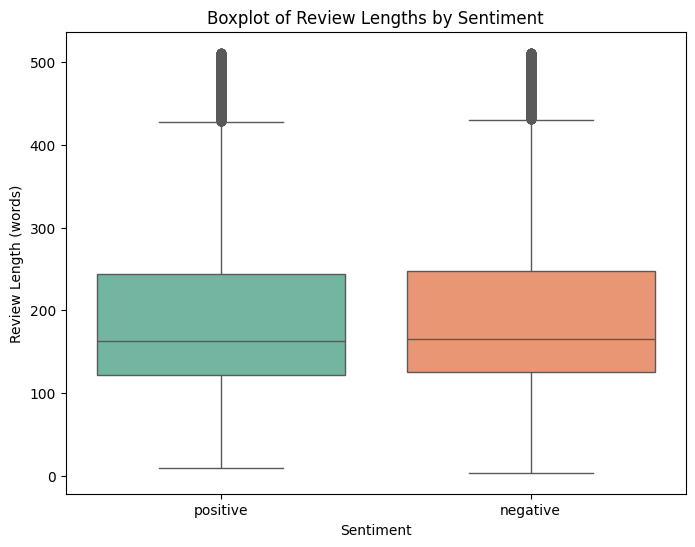

In [21]:
# Boxplot of Review Length by Sentiment
plt.figure(figsize=(8,6))
sns.boxplot(x="sentiment", y="review_word_len", data=df_clean_from_iqr, palette="Set2", hue="sentiment")
plt.title("Boxplot of Review Lengths by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()

In [22]:
df.head()

,review,sentiment,review_char_len,review_word_len
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


# Most Common Words (Positive vs Negative)

In [23]:
# !pip install nltk

In [24]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\scl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
len(stop_words)

198

In [27]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
def preprocess_text(text):
    # Lowercase & remove non-alphabetic characters
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return [w for w in words if w not in stop_words and w!="br"]

In [29]:
# Separate reviews by sentiment
pos_reviews = df[df['sentiment']=="positive"]['review'].apply(preprocess_text)
neg_reviews = df[df['sentiment']=="negative"]['review'].apply(preprocess_text)

In [30]:
type(pos_reviews)

pandas.core.series.Series

In [31]:
# Flatten lists
pos_words = [word for review in pos_reviews for word in review]
neg_words = [word for review in neg_reviews for word in review]

In [32]:
# Get most common words
pos_common = Counter(pos_words).most_common(20)
neg_common = Counter(neg_words).most_common(20)

In [33]:
print("Top 20 Positive Words:", pos_common)
print("Top 20 Negative Words:", neg_common)

Top 20 Positive Words: [('film', 42110), ('movie', 37854), ('one', 27320), ('like', 17714), ('good', 15025), ('great', 12964), ('story', 12934), ('time', 12752), ('well', 12729), ('see', 12276), ('also', 10793), ('really', 10739), ('would', 10595), ('even', 9617), ('first', 9230), ('much', 9201), ('people', 8719), ('love', 8692), ('best', 8510), ('get', 8285)]
Top 20 Negative Words: [('movie', 50117), ('film', 37595), ('one', 26283), ('like', 22458), ('even', 15254), ('good', 14728), ('bad', 14726), ('would', 14007), ('time', 12358), ('really', 12355), ('see', 10753), ('story', 10185), ('get', 10136), ('much', 10117), ('people', 9469), ('make', 9355), ('could', 9300), ('made', 8801), ('well', 8539), ('first', 8353)]


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
def get_top_ngrams(words_list, ngram_range=(2,2), top_n=10):
    # (2,2) -> only bigrams
    # (3,3) -> only trigram
    # (1,2) --> mix of uni and bigrams
    # (1,3) --> uni + bi + trigrams
    # similar to python range but without exclsion
    vec = CountVectorizer(ngram_range=ngram_range)
    bag = vec.fit_transform([' '.join(words_list)])
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]


In [36]:
# Top bigrams
print("Top Positive Bigrams:", get_top_ngrams(pos_words, (2,2)))
print("Top Negative Bigrams:", get_top_ngrams(neg_words, (2,2)))

Top Positive Bigrams: [('one best', np.int64(1680)), ('even though', np.int64(1099)), ('ever seen', np.int64(976)), ('first time', np.int64(960)), ('new york', np.int64(855)), ('special effects', np.int64(806)), ('see movie', np.int64(784)), ('must see', np.int64(778)), ('real life', np.int64(761)), ('years ago', np.int64(741))]
Top Negative Bigrams: [('ever seen', np.int64(1734)), ('special effects', np.int64(1443)), ('waste time', np.int64(1437)), ('looks like', np.int64(1234)), ('low budget', np.int64(1229)), ('much better', np.int64(1009)), ('one worst', np.int64(964)), ('look like', np.int64(945)), ('bad movie', np.int64(927)), ('year old', np.int64(914))]


In [37]:
# Top trigrams
print("Top Positive Trigrams:", get_top_ngrams(pos_words, (3,3)))
print("Top Negative Trigrams:", get_top_ngrams(neg_words, (3,3)))

Top Positive Trigrams: [('new york city', np.int64(195)), ('world war ii', np.int64(167)), ('one best movies', np.int64(144)), ('based true story', np.int64(135)), ('movie ever seen', np.int64(134)), ('one best films', np.int64(132)), ('first time saw', np.int64(115)), ('movies ever seen', np.int64(112)), ('films ever made', np.int64(99)), ('well worth watching', np.int64(95))]
Top Negative Trigrams: [('worst movie ever', np.int64(459)), ('movie ever seen', np.int64(394)), ('one worst movies', np.int64(311)), ('worst movies ever', np.int64(282)), ('movies ever seen', np.int64(268)), ('worst film ever', np.int64(202)), ('waste time money', np.int64(181)), ('one worst films', np.int64(169)), ('film ever seen', np.int64(166)), ('movie ever made', np.int64(155))]


In [38]:
# !pip install wordcloud

In [39]:
from wordcloud import WordCloud

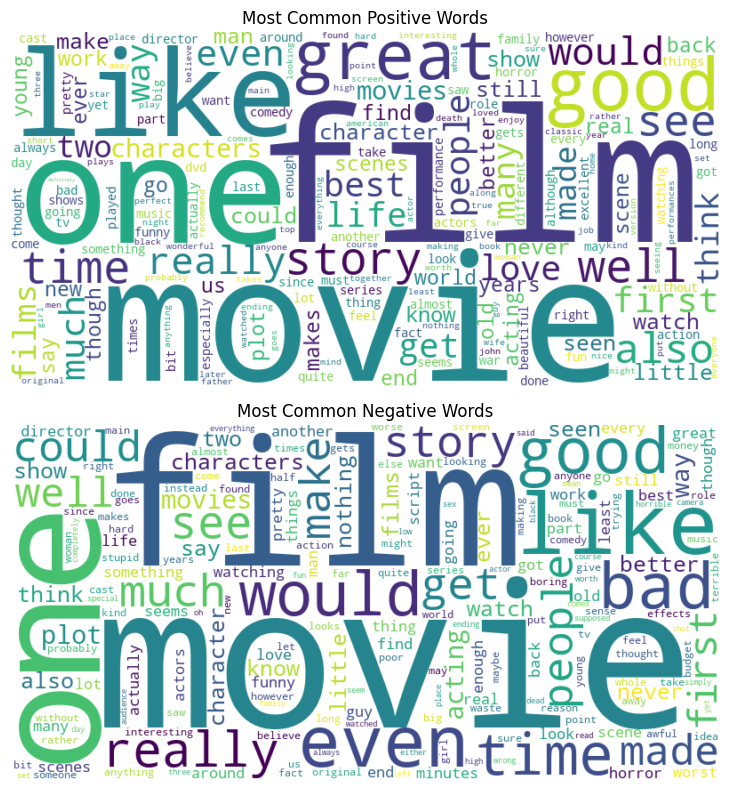

In [40]:
# Get most common words
pos_common_300 = Counter(pos_words).most_common(300)
neg_common_300 = Counter(neg_words).most_common(300)

pos_word_dict = dict(pos_common_300)
neg_word_dict = dict(neg_common_300)

# Generate a word cloud for positive words
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_word_dict)

# Generate a word cloud for negative words
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neg_word_dict)



# Plot the word clouds
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Most Common Positive Words')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Most Common Negative Words')
plt.axis('off')

plt.tight_layout()
plt.show()

# inferential Stats

In [42]:
# Goal 1 :

from scipy.stats import ttest_ind
# two-sample hypothesis test

# Check if review len differs significantly between positive and negative reviews

# Split review lengths by sentiment
pos_lengths = df[df['sentiment'] == 'positive']['review_word_len']
neg_lengths = df[df['sentiment'] == 'negative']['review_word_len']

# two-sample hypothesis test
# Perform independent samples t-test
# H0 : Average review length (in words) is the same for positive and negative review
# H1 : Average review length (in words) is different between positive and negative reviews.
t_stat, p_value = ttest_ind(pos_lengths, neg_lengths, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Calculate means and median for interpretation
print("Mean words (positive reviews):", pos_lengths.mean())
print("Mean words (negative reviews):", neg_lengths.mean())

print("Median words (positive reviews):", pos_lengths.median())
print("Median words (negative reviews):", neg_lengths.median())

T-statistic: 2.2086700126903724
P-value: 0.027202144656625776
Mean words (positive reviews): 232.84932
Mean words (negative reviews): 229.46456
Median words (positive reviews): 172.0
Median words (negative reviews): 174.0


In [ ]:
# Conclusion : 0.027 < 0.05 means We reject H0, average review length is different

df.shape

(50000, 4)

In [49]:
# testing on subset of data

df_subset = df.sample(n=1000, random_state=10)

# Split review lengths by sentiment
pos_lengths_sub = df_subset[df_subset['sentiment'] == 'positive']['review_word_len']
neg_lengths_sub = df_subset[df_subset['sentiment'] == 'negative']['review_word_len']

# two-sample hypothesis test
# Perform independent samples t-test
# H0 : Average review length (in words) is the same for positive and negative review
# H1 : Average review length (in words) is different between positive and negative reviews.
t_stat_sub, p_value_sub = ttest_ind(pos_lengths_sub, neg_lengths_sub, equal_var=False)

print("T-statistic:", t_stat_sub)
print("P-value:", p_value_sub)

# Calculate means and median for interpretation
print("Mean words (positive reviews):", pos_lengths_sub.mean())
print("Mean words (negative reviews):", neg_lengths_sub.mean())

print("Median words (positive reviews):", pos_lengths_sub.median())
print("Median words (negative reviews):", neg_lengths_sub.median())

T-statistic: 0.7794465378567212
P-value: 0.4359019526202903
Mean words (positive reviews): 226.5078431372549
Mean words (negative reviews): 218.80408163265307
Median words (positive reviews): 172.0
Median words (negative reviews): 170.0


In [ ]:
# We fail to reject H0

In [51]:
# Chi-Square Test of Independence

# H0 : Average review length (in words) is the same for positive and negative review
# H1 : Average review length (in words) is different between positive and negative reviews.

# Categorial
# word length : Not categorical
# Sentiment → categorical (positive, negative)
# Review length category → categorical (short, long)

df_subset['review_length_cat'] = df_subset['review_word_len'].apply(lambda x: 'short' if x <= 100 else 'long')

contingency = pd.crosstab(df_subset['review_length_cat'], df_subset['sentiment'])
print("Contingency Table:\n", contingency)

Contingency Table:
 sentiment          negative  positive
review_length_cat                    
long                    439       450
short                    51        60


In [52]:
from scipy.stats import chi2_contingency

In [53]:
chi2, p, _ , _ = chi2_contingency(contingency)

In [ ]:
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

# we again fail to reject the null hypothesis, means H1 is true


# P < 0.05 : we reject h0 ELSE we fail to reject H0
# : H0 is true

# h0 IS ALWAYS TRUE


Chi-Square Statistic: 0.33869180582984193
P-value: 0.5605853114026997


In [ ]:
# t-test, chi-square (inferential)
# mean, median + cintigency table (descriptive)


